In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/Project/dataset.zip

Archive:  drive/MyDrive/Project/dataset.zip
replace dataset/flooded/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
flooded_path = "dataset/flooded"
non_flooded_path = "dataset/non-flooded"

import os

def count_files(path):
  return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])

print(f"Flooded Images Count: {count_files(flooded_path)}")
print(f"Non Flooded Images Count: {count_files(non_flooded_path)}")

# Balanced

Flooded Images Count: 461
Non Flooded Images Count: 461


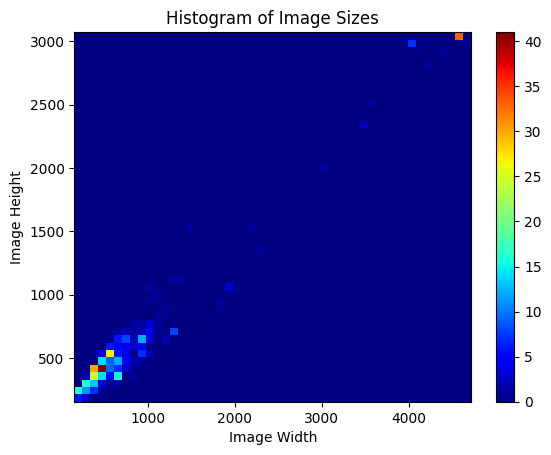

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image folder
image_folder = flooded_path

# Initialize an empty list to store the image sizes
image_sizes = []

# Loop through all the images in the folder and store their sizes
for filename in os.listdir(image_folder):
    img = Image.open(os.path.join(image_folder, filename))
    width, height = img.size
    image_sizes.append((width, height))

# Convert the image sizes list to a numpy array
image_sizes = np.array(image_sizes)

# Plot a histogram of the image sizes
plt.hist2d(image_sizes[:, 0], image_sizes[:, 1], bins=50, cmap=plt.cm.jet)
plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Histogram of Image Sizes")
plt.colorbar()
plt.show()

In [ ]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split



# Define the image size and number of classes
img_size = (256, 256)
num_classes = 2

# Load the images and create the labels
flooded_images = []
non_flooded_images = []

for img_path in os.listdir(flooded_path):
    img = Image.open(os.path.join(flooded_path, img_path)).resize(img_size)
    flooded_images.append(np.array(img))
    
for img_path in os.listdir(non_flooded_path):
    img = Image.open(os.path.join(non_flooded_path, img_path)).resize(img_size)
    non_flooded_images.append(np.array(img))

# Convert the images to numpy arrays and normalize the pixel values
flooded_images = np.array(flooded_images) / 255.
non_flooded_images = np.array(non_flooded_images) / 255.

# Create the labels
flooded_labels = np.ones(len(flooded_images))
non_flooded_labels = np.zeros(len(non_flooded_images))

# Merge the data and labelsand split into training, validation, and testing sets using the `train_test_split` function from scikit-learn library:

X = np.concatenate([flooded_images, non_flooded_images])
y = np.concatenate([flooded_labels, non_flooded_labels])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shape of the data and labels
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create data generators for training, validation, and testing
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


In [ ]:
from keras.applications import VGG16, ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as a feature extractor
model = Sequential()
model.add(vgg16)
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
21/21 [==============================] - 21s 333ms/step - loss: 0.4595 - accuracy: 0.7364 - val_loss: 0.3474 - val_accuracy: 0.8551
Epoch 2/10
21/21 [==============================] - 4s 178ms/step - loss: 0.1934 - accuracy: 0.9380 - val_loss: 0.3390 - val_accuracy: 0.8551
Epoch 3/10
21/21 [==============================] - 4s 175ms/step - loss: 0.1131 - accuracy: 0.9767 - val_loss: 0.2798 - val_accuracy: 0.8768
Epoch 4/10
21/21 [==============================] - 4s 206ms/step - loss: 0.0861 - accuracy: 0.9860 - val_loss: 0.2714 - val_accuracy: 0.8768
Epoch 5/10
21/21 [==============================] - 4s 178ms/step - loss: 0.0645 - accuracy: 0.9922 - val_loss: 0.2751 - val_accuracy: 0.8841
Epoch 6/10
21/21 [==============================] - 4s 178ms/step - loss: 0.0519 - accuracy: 0.9953 - val_loss: 0.2439 - val_accuracy: 0.8913
Epoch 7/10
21/21 [==============================] - 4s 211ms/step - loss: 0.0375 -

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 3s 616ms/step - loss: 0.2326 - accuracy: 0.8993
Test loss: 0.2326185405254364
Test accuracy: 0.8992805480957031


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf.fit(X_train_flat, y_train)

# Evaluate the classifier on the test set
y_pred = rf.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Test accuracy:', accuracy)
print('Test precision:', precision)
print('Test recall:', recall)
print('Test F1 score:', f1)

Test accuracy: 0.7243243243243244
Test precision: 0.7473684210526316
Test recall: 0.7244897959183674
Test F1 score: 0.7357512953367875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the input data
X_train_flat = X_train.reshape((X_train.shape[0], -1))

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_flat, y_train)

# Print the best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)


best_model = grid_search.best_estimator_

X_test_flat = X_test.reshape((X_test.shape[0], -1))
y_pred = best_model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Test accuracy:', accuracy)
print('Test precision:', precision)
print('Test recall:', recall)
print('Test F1 score:', f1)